In [1]:
import numpy as np
import pandas as pd
import torch
import pickle

from tqdm import tnrange, tqdm_notebook
from tqdm.autonotebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
#solved chinese display in matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams["font.family"] = "DFKai-SB"
rcParams['axes.unicode_minus'] = False

from Model import EncoderOneLayer
from ArticlesRep import MeanSimilarityoneindustry,MeanSimilaritytwoindustry
def IQR(array):
    Q3,Q1=np.percentile(array,[75,25])
    return Q3-Q1

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Load model & trainset & testset & dict_guid_onehot

In [2]:
model=EncoderOneLayer(20000,100)
model.load_state_dict(torch.load("EncoderStat.pt",map_location='cpu'))
model.eval()
for p in model.parameters():
    p.requires_grad_(False)
with open("../dict_train_industry_guid.p","rb") as f:
    dict_train_industry_guid=pickle.load(f)
with open("../dict_test_industry_guid.p","rb") as f:
    dict_test_industry_guid=pickle.load(f)
with open("D:4.AutoencoderForArticle.Mid-Industry/dict_guid_sparsebow_20000_single.v05.p","rb") as f:
    dict_guid_sparsebow_20000_single=pickle.load(f)

#### Testset 

In [3]:
li=[]
model=model
dict_collect_industry=dict_test_industry_guid
bow=dict_guid_sparsebow_20000_single
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    if len(array1)!=0:
        array1=model(torch.from_numpy(array1)).numpy()
        for j in dict_collect_industry:
                array2=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[j]],dtype=np.float32).squeeze()
                if len(array2)!=0:
                    array2=model(torch.from_numpy(array2)).numpy()
                    simi=MeanSimilaritytwoindustry(array1,array2)
                    print(k,j,simi)
                    li.append((k,j,simi))

IC製造 IC製造 0.7568493
IC製造 紡織中游 0.14026342
IC製造 服務業 0.20510879
IC製造 消費性電子產品 0.38653874
IC製造 通訊設備 0.31832522
IC製造 電力 0.2112982
IC製造 農林漁牧 0.06978889
IC製造 面板零組件 0.2864322
IC製造 車輛整車 0.12730178
IC製造 不鏽鋼 0.09745206
IC製造 顯示器 0.33102012
IC製造 橡膠工業 0.12234845
IC製造 電聲產品 0.06857587
IC製造 傳播事業 0.18125723
IC製造 休閒娛樂 0.080443576
IC製造 遊戲產業 0.14585544
IC製造 礦石開採 0.20714389
IC製造 家居用品 0.09369359
IC製造 運動產業 0.21798205
IC製造 合金鋼 0.08764439
IC製造 貴金屬 0.17318061
IC製造 Internet相關 0.2600755
IC製造 旅館、餐飲 0.043634705
IC製造 通訊服務 0.27879488
IC製造 飲料相關 0.0128424335
IC製造 水泥 0.10981134
IC製造 電子其他 0.37539223
IC製造 汽機車零組件 0.08277517
IC製造 營造工程 0.16166203
IC製造 基礎建設營運 0.04372581
IC製造 成衣 0.11063143
IC製造 週邊產品 0.40891466
IC製造 設備儀器廠商 0.49625465
IC製造 光碟片 0.3185997
IC製造 線材、盤元 0.12843828
IC製造 水資源 0.201468
IC製造 造紙業 0.2061175
IC製造 傳產其他 0.23807918
IC製造 航天軍工 0.24593626
IC製造 LED 0.3842175
IC製造 食品加工 0.050220117
IC製造 手機 0.34010434
IC製造 運輸事業 0.14859335
IC製造 手機零組件 0.2760785
IC製造 建材 0.09368685
IC製造 電腦系統業 0.4458139
IC製造 化纖原料 0.13174173
IC製造 石化業 0.2117434

通訊設備 條鋼 0.02174012
通訊設備 化學工業 0.14156453
通訊設備 非鐵金屬 0.037120912
通訊設備 地產 0.0625306
通訊設備 被動元件 0.25787425
通訊設備 電力設備 0.26514718
通訊設備 分離式元件 0.15430039
通訊設備 電子零件元件 0.39622524
通訊設備 面板業 0.20961587
通訊設備 太陽能 0.21476115
通訊設備 其他公用事業 0.006104381
通訊設備 印刷電路板相關 0.23385373
通訊設備 IC設計 0.4263905
通訊設備 軟體業 0.48908794
通訊設備 大宗物資 -0.044980675
通訊設備 醫療器材通路 0.1287285
通訊設備 時尚產業 0.12132855
通訊設備 輔助與彌補用醫材 0.19054651
電力 IC製造 0.2112982
電力 紡織中游 0.12647502
電力 服務業 0.26068842
電力 消費性電子產品 0.11027415
電力 通訊設備 0.1243826
電力 電力 0.628103
電力 農林漁牧 0.37738016
電力 面板零組件 0.15505487
電力 車輛整車 0.31659007
電力 不鏽鋼 0.0047627715
電力 顯示器 0.19278146
電力 橡膠工業 0.12654994
電力 電聲產品 -0.0031343517
電力 傳播事業 0.21542537
電力 休閒娛樂 0.08736222
電力 遊戲產業 0.093583845
電力 礦石開採 0.22756302
電力 家居用品 0.09964139
電力 運動產業 0.0669955
電力 合金鋼 0.20223668
電力 貴金屬 0.20267
電力 Internet相關 0.18863568
電力 旅館、餐飲 0.057988793
電力 通訊服務 0.16710795
電力 飲料相關 0.21408203
電力 水泥 0.16785485
電力 電子其他 0.15004542
電力 汽機車零組件 0.17095856
電力 營造工程 0.22637953
電力 基礎建設營運 0.30987987
電力 成衣 0.03080714
電力 週邊產品 0.10078034
電力 

不鏽鋼 石油及天然氣 0.031535562
不鏽鋼 光通訊 0.11723116
不鏽鋼 板鋼 0.41326025
不鏽鋼 醫藥產業 0.17148665
不鏽鋼 IC封裝測試 0.018183738
不鏽鋼 機械 0.19048251
不鏽鋼 條鋼 0.39677158
不鏽鋼 化學工業 0.1657059
不鏽鋼 非鐵金屬 0.31270748
不鏽鋼 地產 0.09451533
不鏽鋼 被動元件 0.2906516
不鏽鋼 電力設備 0.051428825
不鏽鋼 分離式元件 0.2406419
不鏽鋼 電子零件元件 0.1353163
不鏽鋼 面板業 0.040553167
不鏽鋼 太陽能 0.13398455
不鏽鋼 其他公用事業 0.035179157
不鏽鋼 印刷電路板相關 0.0810109
不鏽鋼 IC設計 0.038994223
不鏽鋼 軟體業 0.006663171
不鏽鋼 大宗物資 0.09964024
不鏽鋼 醫療器材通路 0.09329333
不鏽鋼 時尚產業 0.09444578
不鏽鋼 輔助與彌補用醫材 0.027130509
顯示器 IC製造 0.33102015
顯示器 紡織中游 0.08424361
顯示器 服務業 0.120105885
顯示器 消費性電子產品 0.49309433
顯示器 通訊設備 0.28072736
顯示器 電力 0.19278146
顯示器 農林漁牧 0.029294532
顯示器 面板零組件 0.44127056
顯示器 車輛整車 0.29510558
顯示器 不鏽鋼 0.079923585
顯示器 顯示器 0.6869782
顯示器 橡膠工業 0.18576184
顯示器 電聲產品 0.13754934
顯示器 傳播事業 0.1866612
顯示器 休閒娛樂 0.06405388
顯示器 遊戲產業 0.26364118
顯示器 礦石開採 0.13682687
顯示器 家居用品 0.21739478
顯示器 運動產業 0.14879104
顯示器 合金鋼 -0.004651889
顯示器 貴金屬 0.05682982
顯示器 Internet相關 0.26572916
顯示器 旅館、餐飲 0.0995957
顯示器 通訊服務 0.18046845
顯示器 飲料相關 0.23717809
顯示器 水

休閒娛樂 生物科技 0.17638272
休閒娛樂 家電 0.15429145
休閒娛樂 電子通路 0.21499516
休閒娛樂 數位相機 0.09884738
休閒娛樂 封測服務與材料 0.08789608
休閒娛樂 電線電纜 0.09414451
休閒娛樂 流通業 0.34248468
休閒娛樂 石油及天然氣 0.024636006
休閒娛樂 光通訊 0.07124094
休閒娛樂 板鋼 0.089838065
休閒娛樂 醫藥產業 0.11253632
休閒娛樂 IC封裝測試 0.1622051
休閒娛樂 機械 0.12695286
休閒娛樂 條鋼 0.09728997
休閒娛樂 化學工業 0.14060985
休閒娛樂 非鐵金屬 0.06888054
休閒娛樂 地產 0.2376418
休閒娛樂 被動元件 0.072515704
休閒娛樂 電力設備 0.08670434
休閒娛樂 分離式元件 -0.010532042
休閒娛樂 電子零件元件 0.062394157
休閒娛樂 面板業 0.018126724
休閒娛樂 太陽能 -0.041847453
休閒娛樂 其他公用事業 0.022604598
休閒娛樂 印刷電路板相關 0.03805981
休閒娛樂 IC設計 0.1483583
休閒娛樂 軟體業 0.26078212
休閒娛樂 大宗物資 0.0788475
休閒娛樂 醫療器材通路 0.15664825
休閒娛樂 時尚產業 0.25533214
休閒娛樂 輔助與彌補用醫材 0.1824228
遊戲產業 IC製造 0.14585541
遊戲產業 紡織中游 0.076003976
遊戲產業 服務業 0.1725111
遊戲產業 消費性電子產品 0.4350246
遊戲產業 通訊設備 0.25499135
遊戲產業 電力 0.093583845
遊戲產業 農林漁牧 0.03298401
遊戲產業 面板零組件 0.15472321
遊戲產業 車輛整車 0.19813417
遊戲產業 不鏽鋼 0.1207383
遊戲產業 顯示器 0.26364118
遊戲產業 橡膠工業 0.06693587
遊戲產業 電聲產品 0.14888309
遊戲產業 傳播事業 0.26596543
遊戲產業 休閒娛樂 0.26480895
遊戲產業 遊戲產業 0.75962335
遊戲產業

合金鋼 傳產其他 0.13156344
合金鋼 航天軍工 0.23180524
合金鋼 LED 0.10714442
合金鋼 食品加工 0.027004272
合金鋼 手機 -0.019527601
合金鋼 運輸事業 0.107431486
合金鋼 手機零組件 0.09549018
合金鋼 建材 0.23945794
合金鋼 電腦系統業 0.049669396
合金鋼 化纖原料 0.19622266
合金鋼 石化業 0.1914577
合金鋼 金融業 0.07274006
合金鋼 生物科技 0.2190676
合金鋼 家電 -0.034698106
合金鋼 電子通路 0.0869774
合金鋼 數位相機 0.100788094
合金鋼 封測服務與材料 0.16891928
合金鋼 電線電纜 0.20693474
合金鋼 流通業 0.026906183
合金鋼 石油及天然氣 0.14239776
合金鋼 光通訊 0.16302885
合金鋼 板鋼 0.26539603
合金鋼 醫藥產業 0.23035549
合金鋼 IC封裝測試 0.112938575
合金鋼 機械 0.24868368
合金鋼 條鋼 0.25201154
合金鋼 化學工業 0.20106235
合金鋼 非鐵金屬 0.21791135
合金鋼 地產 0.13372105
合金鋼 被動元件 0.28648058
合金鋼 電力設備 0.1797806
合金鋼 分離式元件 0.25022537
合金鋼 電子零件元件 0.11500634
合金鋼 面板業 0.005099896
合金鋼 太陽能 0.15958045
合金鋼 其他公用事業 0.12962064
合金鋼 印刷電路板相關 0.031221172
合金鋼 IC設計 0.048986707
合金鋼 軟體業 0.06895813
合金鋼 大宗物資 0.10492065
合金鋼 醫療器材通路 0.17140438
合金鋼 時尚產業 0.07621364
合金鋼 輔助與彌補用醫材 0.10760005
貴金屬 IC製造 0.17318058
貴金屬 紡織中游 0.1801047
貴金屬 服務業 0.32948676
貴金屬 消費性電子產品 0.1269059
貴金屬 通訊設備 -0.008166815
貴金屬 電力 0.20267001
貴金屬 農林漁牧 0

飲料相關 消費性電子產品 0.1913025
飲料相關 通訊設備 0.1191959
飲料相關 電力 0.21408206
飲料相關 農林漁牧 0.2966194
飲料相關 面板零組件 0.2187888
飲料相關 車輛整車 0.22744763
飲料相關 不鏽鋼 -0.078205995
飲料相關 顯示器 0.23717809
飲料相關 橡膠工業 0.25044206
飲料相關 電聲產品 0.14984918
飲料相關 傳播事業 0.2738653
飲料相關 休閒娛樂 0.22647709
飲料相關 遊戲產業 0.1343664
飲料相關 礦石開採 0.03633006
飲料相關 家居用品 0.28291553
飲料相關 運動產業 0.22890389
飲料相關 合金鋼 0.027264854
飲料相關 貴金屬 0.105892874
飲料相關 Internet相關 0.28139803
飲料相關 旅館、餐飲 0.2914651
飲料相關 通訊服務 0.0917096
飲料相關 飲料相關 0.64951044
飲料相關 水泥 0.19646332
飲料相關 電子其他 0.082176566
飲料相關 汽機車零組件 0.15056743
飲料相關 營造工程 0.14329816
飲料相關 基礎建設營運 0.16392249
飲料相關 成衣 0.25095165
飲料相關 週邊產品 0.19493069
飲料相關 設備儀器廠商 0.05445559
飲料相關 光碟片 0.20672116
飲料相關 線材、盤元 0.047579758
飲料相關 水資源 0.2228895
飲料相關 造紙業 0.23826444
飲料相關 傳產其他 0.32238653
飲料相關 航天軍工 0.17428875
飲料相關 LED 0.12810875
飲料相關 食品加工 0.5526837
飲料相關 手機 0.16666126
飲料相關 運輸事業 0.15697873
飲料相關 手機零組件 0.092449136
飲料相關 建材 0.20062664
飲料相關 電腦系統業 0.18685074
飲料相關 化纖原料 0.22251569
飲料相關 石化業 0.15264684
飲料相關 金融業 0.19736621
飲料相關 生物科技 0.21821395
飲料相關 家電 0.306901

營造工程 其他公用事業 0.090562776
營造工程 印刷電路板相關 0.04063703
營造工程 IC設計 0.12489013
營造工程 軟體業 0.21661127
營造工程 大宗物資 0.10718581
營造工程 醫療器材通路 0.1646345
營造工程 時尚產業 0.076594956
營造工程 輔助與彌補用醫材 0.13061431
基礎建設營運 IC製造 0.04372581
基礎建設營運 紡織中游 0.024523295
基礎建設營運 服務業 0.24824345
基礎建設營運 消費性電子產品 0.034474213
基礎建設營運 通訊設備 0.11940361
基礎建設營運 電力 0.30987987
基礎建設營運 農林漁牧 0.29503393
基礎建設營運 面板零組件 0.057438795
基礎建設營運 車輛整車 0.19115566
基礎建設營運 不鏽鋼 -0.05928076
基礎建設營運 顯示器 0.039032422
基礎建設營運 橡膠工業 0.065215126
基礎建設營運 電聲產品 0.093364626
基礎建設營運 傳播事業 0.20732987
基礎建設營運 休閒娛樂 0.23408212
基礎建設營運 遊戲產業 0.044284295
基礎建設營運 礦石開採 0.20438586
基礎建設營運 家居用品 0.0021274104
基礎建設營運 運動產業 -0.06900117
基礎建設營運 合金鋼 0.08815946
基礎建設營運 貴金屬 0.14380297
基礎建設營運 Internet相關 0.21755429
基礎建設營運 旅館、餐飲 0.15441237
基礎建設營運 通訊服務 0.20715009
基礎建設營運 飲料相關 0.16392249
基礎建設營運 水泥 0.23809797
基礎建設營運 電子其他 0.11372798
基礎建設營運 汽機車零組件 0.06351117
基礎建設營運 營造工程 0.3042713
基礎建設營運 基礎建設營運 0.6468077
基礎建設營運 成衣 0.007890929
基礎建設營運 週邊產品 -0.06724562
基礎建設營運 設備儀器廠商 0.07743011
基礎建設營運 光碟片 -0.021597574
基礎建設營運 線材、盤元 -0.00471

光碟片 電線電纜 0.20401601
光碟片 流通業 0.08782134
光碟片 石油及天然氣 0.045144834
光碟片 光通訊 0.26365858
光碟片 板鋼 0.16979046
光碟片 醫藥產業 0.22734857
光碟片 IC封裝測試 0.25587502
光碟片 機械 0.13147561
光碟片 條鋼 0.10497377
光碟片 化學工業 0.30873573
光碟片 非鐵金屬 0.14195335
光碟片 地產 0.08100666
光碟片 被動元件 0.23098956
光碟片 電力設備 0.14703988
光碟片 分離式元件 0.23644345
光碟片 電子零件元件 0.19811477
光碟片 面板業 0.33030385
光碟片 太陽能 0.29384953
光碟片 其他公用事業 0.08256878
光碟片 印刷電路板相關 0.1845437
光碟片 IC設計 0.2937269
光碟片 軟體業 0.32519087
光碟片 大宗物資 0.14473249
光碟片 醫療器材通路 0.15169077
光碟片 時尚產業 0.13352087
光碟片 輔助與彌補用醫材 0.19418739
線材、盤元 IC製造 0.12843831
線材、盤元 紡織中游 0.23704228
線材、盤元 服務業 0.109390646
線材、盤元 消費性電子產品 0.14504245
線材、盤元 通訊設備 0.17437503
線材、盤元 電力 0.056030013
線材、盤元 農林漁牧 -0.010000213
線材、盤元 面板零組件 0.13333721
線材、盤元 車輛整車 0.22398394
線材、盤元 不鏽鋼 0.53457737
線材、盤元 顯示器 0.16065902
線材、盤元 橡膠工業 0.31078225
線材、盤元 電聲產品 0.18843955
線材、盤元 傳播事業 0.11977898
線材、盤元 休閒娛樂 0.11352422
線材、盤元 遊戲產業 0.08626961
線材、盤元 礦石開採 0.24402349
線材、盤元 家居用品 0.30780298
線材、盤元 運動產業 0.24045436
線材、盤元 合金鋼 0.34324923
線材、盤元 貴金屬 0.10318575
線材、盤元 Interne

航天軍工 金融業 0.22541721
航天軍工 生物科技 0.22805189
航天軍工 家電 0.12243335
航天軍工 電子通路 0.17104712
航天軍工 數位相機 0.13605613
航天軍工 封測服務與材料 0.12209955
航天軍工 電線電纜 0.13185172
航天軍工 流通業 0.24373756
航天軍工 石油及天然氣 0.23608889
航天軍工 光通訊 0.18950962
航天軍工 板鋼 0.18227237
航天軍工 醫藥產業 0.18450885
航天軍工 IC封裝測試 0.20915833
航天軍工 機械 0.32188594
航天軍工 條鋼 0.039049756
航天軍工 化學工業 0.22814378
航天軍工 非鐵金屬 0.1456199
航天軍工 地產 0.080989935
航天軍工 被動元件 0.06480118
航天軍工 電力設備 0.25921133
航天軍工 分離式元件 0.07397385
航天軍工 電子零件元件 0.2307591
航天軍工 面板業 0.1486368
航天軍工 太陽能 0.22064061
航天軍工 其他公用事業 0.20113775
航天軍工 印刷電路板相關 0.12032323
航天軍工 IC設計 0.19205618
航天軍工 軟體業 0.27481675
航天軍工 大宗物資 0.058028363
航天軍工 醫療器材通路 0.22279094
航天軍工 時尚產業 0.17513014
航天軍工 輔助與彌補用醫材 0.2340785
LED IC製造 0.3842175
LED 紡織中游 0.15083535
LED 服務業 0.066941574
LED 消費性電子產品 0.21679287
LED 通訊設備 0.1617785
LED 電力 0.12403327
LED 農林漁牧 -0.06530336
LED 面板零組件 0.40520212
LED 車輛整車 0.088624574
LED 不鏽鋼 0.06346567
LED 顯示器 0.39165246
LED 橡膠工業 0.18216938
LED 電聲產品 0.112862326
LED 傳播事業 0.13081788
LED 休閒娛樂 0.054052435
LED 遊戲產業 0.09355275
LE

手機零組件 電腦系統業 0.38828948
手機零組件 化纖原料 0.09792173
手機零組件 石化業 0.12019017
手機零組件 金融業 0.062107142
手機零組件 生物科技 0.046916522
手機零組件 家電 0.20566288
手機零組件 電子通路 0.34885547
手機零組件 數位相機 0.41201776
手機零組件 封測服務與材料 0.24743275
手機零組件 電線電纜 0.28088188
手機零組件 流通業 0.07101799
手機零組件 石油及天然氣 -0.020125806
手機零組件 光通訊 0.2223683
手機零組件 板鋼 0.15112528
手機零組件 醫藥產業 -0.032325618
手機零組件 IC封裝測試 0.27766025
手機零組件 機械 0.21602371
手機零組件 條鋼 0.09271789
手機零組件 化學工業 0.1142375
手機零組件 非鐵金屬 0.11731227
手機零組件 地產 0.018621942
手機零組件 被動元件 0.3715751
手機零組件 電力設備 0.1910509
手機零組件 分離式元件 0.24199687
手機零組件 電子零件元件 0.43002036
手機零組件 面板業 0.29071996
手機零組件 太陽能 0.1254634
手機零組件 其他公用事業 -0.011447325
手機零組件 印刷電路板相關 0.3549458
手機零組件 IC設計 0.3820512
手機零組件 軟體業 0.2160074
手機零組件 大宗物資 -0.0068984195
手機零組件 醫療器材通路 0.056743845
手機零組件 時尚產業 0.14353332
手機零組件 輔助與彌補用醫材 0.13426133
建材 IC製造 0.093686834
建材 紡織中游 0.24875098
建材 服務業 0.14400704
建材 消費性電子產品 0.047188237
建材 通訊設備 0.06261828
建材 電力 0.088897504
建材 農林漁牧 0.0023045598
建材 面板零組件 0.26544374
建材 車輛整車 0.20821486
建材 不鏽鋼 0.18854629
建材 顯示器 0.17008631
建材 橡膠工業

金融業 手機 0.20587055
金融業 運輸事業 0.2662501
金融業 手機零組件 0.06210715
金融業 建材 0.11888222
金融業 電腦系統業 0.22304569
金融業 化纖原料 0.1948265
金融業 石化業 0.19147852
金融業 金融業 0.71637225
金融業 生物科技 0.23693976
金融業 家電 0.1739358
金融業 電子通路 0.2085354
金融業 數位相機 0.06849797
金融業 封測服務與材料 0.06250709
金融業 電線電纜 0.07410726
金融業 流通業 0.4541674
金融業 石油及天然氣 0.20969832
金融業 光通訊 0.041940287
金融業 板鋼 0.26917437
金融業 醫藥產業 0.21192366
金融業 IC封裝測試 0.19374274
金融業 機械 0.16911355
金融業 條鋼 0.1405112
金融業 化學工業 0.19234695
金融業 非鐵金屬 0.13942328
金融業 地產 0.40248555
金融業 被動元件 0.060316842
金融業 電力設備 0.12952133
金融業 分離式元件 0.0848281
金融業 電子零件元件 0.17188857
金融業 面板業 0.21155319
金融業 太陽能 0.21655183
金融業 其他公用事業 0.12082618
金融業 印刷電路板相關 0.010475989
金融業 IC設計 0.16044664
金融業 軟體業 0.27386722
金融業 大宗物資 0.19353665
金融業 醫療器材通路 0.21905567
金融業 時尚產業 0.23218901
金融業 輔助與彌補用醫材 0.15957896
生物科技 IC製造 0.1782665
生物科技 紡織中游 0.3332881
生物科技 服務業 0.19567706
生物科技 消費性電子產品 0.16800301
生物科技 通訊設備 0.17718025
生物科技 電力 0.18583241
生物科技 農林漁牧 0.15847145
生物科技 面板零組件 0.21251814
生物科技 車輛整車 0.1084169
生物科技 不鏽鋼 0.10941722
生物科技 顯示器 0.1013

封測服務與材料 線材、盤元 0.04932128
封測服務與材料 水資源 0.08031632
封測服務與材料 造紙業 0.15991633
封測服務與材料 傳產其他 0.13229793
封測服務與材料 航天軍工 0.12209955
封測服務與材料 LED 0.27679354
封測服務與材料 食品加工 0.046415675
封測服務與材料 手機 0.14483269
封測服務與材料 運輸事業 0.15154651
封測服務與材料 手機零組件 0.24743278
封測服務與材料 建材 0.05328425
封測服務與材料 電腦系統業 0.16276823
封測服務與材料 化纖原料 0.14969555
封測服務與材料 石化業 0.1172357
封測服務與材料 金融業 0.0625071
封測服務與材料 生物科技 0.11900145
封測服務與材料 家電 0.04503649
封測服務與材料 電子通路 0.26774523
封測服務與材料 數位相機 0.17865899
封測服務與材料 封測服務與材料 0.74544215
封測服務與材料 電線電纜 0.25007442
封測服務與材料 流通業 0.05765392
封測服務與材料 石油及天然氣 0.038196165
封測服務與材料 光通訊 0.24419221
封測服務與材料 板鋼 -0.06502208
封測服務與材料 醫藥產業 0.017638206
封測服務與材料 IC封裝測試 0.5568829
封測服務與材料 機械 0.17586967
封測服務與材料 條鋼 -0.07732968
封測服務與材料 化學工業 0.19726786
封測服務與材料 非鐵金屬 0.20020264
封測服務與材料 地產 -0.006245092
封測服務與材料 被動元件 0.2550833
封測服務與材料 電力設備 0.10428574
封測服務與材料 分離式元件 0.29532784
封測服務與材料 電子零件元件 0.2255558
封測服務與材料 面板業 0.15504575
封測服務與材料 太陽能 0.16801645
封測服務與材料 其他公用事業 0.007209505
封測服務與材料 印刷電路板相關 0.51571274
封測服務與材料 IC設計 0.28986832
封測服務與材料 軟體業 0.1267

板鋼 家居用品 0.13638587
板鋼 運動產業 0.15168275
板鋼 合金鋼 0.26539603
板鋼 貴金屬 0.2624106
板鋼 Internet相關 0.09920478
板鋼 旅館、餐飲 0.08768708
板鋼 通訊服務 0.12440257
板鋼 飲料相關 0.031086786
板鋼 水泥 0.27138156
板鋼 電子其他 0.1315797
板鋼 汽機車零組件 0.1877093
板鋼 營造工程 0.25443938
板鋼 基礎建設營運 0.16145323
板鋼 成衣 0.15502562
板鋼 週邊產品 0.15146802
板鋼 設備儀器廠商 0.10705363
板鋼 光碟片 0.16979046
板鋼 線材、盤元 0.45042
板鋼 水資源 0.13284735
板鋼 造紙業 0.2844596
板鋼 傳產其他 0.22853051
板鋼 航天軍工 0.18227237
板鋼 LED 0.10992916
板鋼 食品加工 0.068704
板鋼 手機 0.22568356
板鋼 運輸事業 0.20227425
板鋼 手機零組件 0.15112528
板鋼 建材 0.23399597
板鋼 電腦系統業 0.15708615
板鋼 化纖原料 0.22398959
板鋼 石化業 0.28302026
板鋼 金融業 0.26917443
板鋼 生物科技 0.061212763
板鋼 家電 0.17244762
板鋼 電子通路 0.10812447
板鋼 數位相機 0.19904809
板鋼 封測服務與材料 -0.06502208
板鋼 電線電纜 0.1404768
板鋼 流通業 0.29182902
板鋼 石油及天然氣 0.17652321
板鋼 光通訊 0.061036177
板鋼 板鋼 0.74428374
板鋼 醫藥產業 0.05352528
板鋼 IC封裝測試 0.0504728
板鋼 機械 0.23966569
板鋼 條鋼 0.41678125
板鋼 化學工業 0.24224691
板鋼 非鐵金屬 0.37446582
板鋼 地產 0.22429131
板鋼 被動元件 0.17930657
板鋼 電力設備 0.12458282
板鋼 分離式元件 0.12568785
板鋼 電子零件元件 0.108936176
板

化學工業 運動產業 0.33980137
化學工業 合金鋼 0.20106235
化學工業 貴金屬 0.14191812
化學工業 Internet相關 0.09500973
化學工業 旅館、餐飲 0.14113343
化學工業 通訊服務 0.088984035
化學工業 飲料相關 0.29316396
化學工業 水泥 0.27082926
化學工業 電子其他 0.26478586
化學工業 汽機車零組件 0.27378753
化學工業 營造工程 0.26051152
化學工業 基礎建設營運 0.071140334
化學工業 成衣 0.28307968
化學工業 週邊產品 0.26707864
化學工業 設備儀器廠商 0.29210705
化學工業 光碟片 0.30873573
化學工業 線材、盤元 0.24987687
化學工業 水資源 0.27475095
化學工業 造紙業 0.28401676
化學工業 傳產其他 0.4853149
化學工業 航天軍工 0.22814378
化學工業 LED 0.2510506
化學工業 食品加工 0.33408973
化學工業 手機 0.06014245
化學工業 運輸事業 0.2524599
化學工業 手機零組件 0.1142375
化學工業 建材 0.35890317
化學工業 電腦系統業 0.19928092
化學工業 化纖原料 0.47690278
化學工業 石化業 0.52173716
化學工業 金融業 0.19234695
化學工業 生物科技 0.44717792
化學工業 家電 0.24824148
化學工業 電子通路 0.37078002
化學工業 數位相機 0.13180736
化學工業 封測服務與材料 0.19726786
化學工業 電線電纜 0.28873
化學工業 流通業 0.21043105
化學工業 石油及天然氣 0.18463823
化學工業 光通訊 0.18846858
化學工業 板鋼 0.24224691
化學工業 醫藥產業 0.33592272
化學工業 IC封裝測試 0.21576777
化學工業 機械 0.3323051
化學工業 條鋼 0.049968705
化學工業 化學工業 0.7127822
化學工業 非鐵金屬 0.2954451
化學工業 地產 0.14619943
化學工業

分離式元件 傳播事業 0.092042
分離式元件 休閒娛樂 -0.010532039
分離式元件 遊戲產業 0.17751259
分離式元件 礦石開採 0.07445144
分離式元件 家居用品 0.1060449
分離式元件 運動產業 0.22434689
分離式元件 合金鋼 0.25022534
分離式元件 貴金屬 0.008731857
分離式元件 Internet相關 0.082542345
分離式元件 旅館、餐飲 0.0607398
分離式元件 通訊服務 0.03551263
分離式元件 飲料相關 0.010511024
分離式元件 水泥 0.10365004
分離式元件 電子其他 0.1908387
分離式元件 汽機車零組件 0.20768976
分離式元件 營造工程 0.12520033
分離式元件 基礎建設營運 -0.092305586
分離式元件 成衣 0.10231509
分離式元件 週邊產品 0.24792175
分離式元件 設備儀器廠商 0.22596759
分離式元件 光碟片 0.23644346
分離式元件 線材、盤元 0.16959585
分離式元件 水資源 0.114772394
分離式元件 造紙業 0.22062467
分離式元件 傳產其他 0.19464202
分離式元件 航天軍工 0.07397384
分離式元件 LED 0.41600475
分離式元件 食品加工 0.05428446
分離式元件 手機 0.13083398
分離式元件 運輸事業 0.0034322094
分離式元件 手機零組件 0.24199687
分離式元件 建材 0.14650078
分離式元件 電腦系統業 0.22257714
分離式元件 化纖原料 0.1740566
分離式元件 石化業 0.20335393
分離式元件 金融業 0.08482809
分離式元件 生物科技 0.13759954
分離式元件 家電 0.16919142
分離式元件 電子通路 0.2589447
分離式元件 數位相機 0.26589006
分離式元件 封測服務與材料 0.29532787
分離式元件 電線電纜 0.24625751
分離式元件 流通業 0.047598157
分離式元件 石油及天然氣 0.120804615
分離式元件 光通訊 0.2905028
分離式元件

其他公用事業 面板業 0.053031746
其他公用事業 太陽能 0.1841272
其他公用事業 其他公用事業 0.85894454
其他公用事業 印刷電路板相關 -0.08573096
其他公用事業 IC設計 0.068173066
其他公用事業 軟體業 0.035058003
其他公用事業 大宗物資 0.108971246
其他公用事業 醫療器材通路 0.02425357
其他公用事業 時尚產業 0.061151758
其他公用事業 輔助與彌補用醫材 0.079254165
印刷電路板相關 IC製造 0.30363595
印刷電路板相關 紡織中游 0.26673913
印刷電路板相關 服務業 0.03696436
印刷電路板相關 消費性電子產品 0.24402481
印刷電路板相關 通訊設備 0.23385374
印刷電路板相關 電力 0.076591484
印刷電路板相關 農林漁牧 0.064699285
印刷電路板相關 面板零組件 0.35438475
印刷電路板相關 車輛整車 0.16429292
印刷電路板相關 不鏽鋼 0.0810109
印刷電路板相關 顯示器 0.22041067
印刷電路板相關 橡膠工業 0.22613618
印刷電路板相關 電聲產品 0.2656764
印刷電路板相關 傳播事業 0.14624035
印刷電路板相關 休閒娛樂 0.03805981
印刷電路板相關 遊戲產業 0.19672816
印刷電路板相關 礦石開採 -0.027293209
印刷電路板相關 家居用品 0.2561788
印刷電路板相關 運動產業 0.23017007
印刷電路板相關 合金鋼 0.03122117
印刷電路板相關 貴金屬 0.018920721
印刷電路板相關 Internet相關 0.13598
印刷電路板相關 旅館、餐飲 0.07477332
印刷電路板相關 通訊服務 0.15205711
印刷電路板相關 飲料相關 0.14286067
印刷電路板相關 水泥 0.17818382
印刷電路板相關 電子其他 0.2841882
印刷電路板相關 汽機車零組件 0.33101138
印刷電路板相關 營造工程 0.04063703
印刷電路板相關 基礎建設營運 0.0021869808
印刷電路板相關 成衣 0.20500576
印刷電路板相關 

醫療器材通路 建材 0.1440073
醫療器材通路 電腦系統業 0.18079516
醫療器材通路 化纖原料 0.029290246
醫療器材通路 石化業 0.0910941
醫療器材通路 金融業 0.21905564
醫療器材通路 生物科技 0.51468563
醫療器材通路 家電 0.19414155
醫療器材通路 電子通路 0.28017431
醫療器材通路 數位相機 0.2094528
醫療器材通路 封測服務與材料 0.12659389
醫療器材通路 電線電纜 0.056119163
醫療器材通路 流通業 0.2232669
醫療器材通路 石油及天然氣 0.09235343
醫療器材通路 光通訊 0.0655165
醫療器材通路 板鋼 0.05521266
醫療器材通路 醫藥產業 0.48752633
醫療器材通路 IC封裝測試 0.167936
醫療器材通路 機械 0.26331297
醫療器材通路 條鋼 0.0067022075
醫療器材通路 化學工業 0.24477582
醫療器材通路 非鐵金屬 -0.036082085
醫療器材通路 地產 0.09646706
醫療器材通路 被動元件 0.12151463
醫療器材通路 電力設備 0.2415196
醫療器材通路 分離式元件 0.16796194
醫療器材通路 電子零件元件 0.26955265
醫療器材通路 面板業 0.11722694
醫療器材通路 太陽能 0.116275325
醫療器材通路 其他公用事業 0.02425357
醫療器材通路 印刷電路板相關 0.05744075
醫療器材通路 IC設計 0.18911229
醫療器材通路 軟體業 0.21671303
醫療器材通路 大宗物資 0.06890883
醫療器材通路 醫療器材通路 0.6373513
醫療器材通路 時尚產業 0.3182291
醫療器材通路 輔助與彌補用醫材 0.2935309
時尚產業 IC製造 0.16409767
時尚產業 紡織中游 0.19457707
時尚產業 服務業 0.21726143
時尚產業 消費性電子產品 0.18471645
時尚產業 通訊設備 0.12132854
時尚產業 電力 0.1195698
時尚產業 農林漁牧 0.1615521
時尚產業 面板零組件 0.16197963
時尚產業 車

In [4]:
df_trainAE=pd.DataFrame(li)
df_trainAE=df_trainAE.pivot(index=0,columns=1,values=2)

In [5]:
li=[]
for i,S in df_trainAE[:].iterrows():
    R=S.loc[i]
    UR=S.drop(i).mean()
    result=(R-UR)/2
    li.append((i,R,UR,result))
df=pd.DataFrame(li).rename(columns={0:"industry",1:"R",2:"UR",3:"(R-UR)/2"}).sort_values("(R-UR)/2",ascending=False)
df=df.set_index("industry")

In [8]:
df

,R,UR,(R-UR)/2
industry,,,
其他公用事業,0.858945,0.079883,0.389531
條鋼,0.807012,0.080060,0.363476
石油及天然氣,0.780099,0.100191,0.339954
不鏽鋼,0.791610,0.112733,0.339438
礦石開採,0.799459,0.134574,0.332442
合金鋼,0.783607,0.131105,0.326251
造紙業,0.796180,0.156868,0.319656
被動元件,0.806016,0.173383,0.316316
貴金屬,0.752594,0.127035,0.312779


## Similarity distribution

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
similDistb={}
model=model
dict_collect_industry=dict_test_industry_guid
bow=dict_guid_sparsebow_20000_single
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    array1=model(torch.from_numpy(array1)).numpy()
    simi=cosine_similarity(array1)
    simi=simi[np.tri(simi.shape[0],simi.shape[1],k=-1)==1]
    similDistb[k]=simi

In [12]:
similDistb["IC設計"]

array([0.65505195, 0.7026417 , 0.86262786, ..., 0.5843501 , 0.5527215 ,
       0.5374788 ], dtype=float32)

## Dissimilarity distribution

In [11]:
dissimilDistb={}
model=model
dict_collect_industry=dict_test_industry_guid
for k in tqdm_notebook(list(dict_collect_industry.keys())):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    array1=model(torch.from_numpy(array1)).numpy()
    simitotla=[]
    for j in list(dict_collect_industry.keys()):
        if k!=j:
            array2=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[j]],dtype=np.float32).squeeze()
            array2=model(torch.from_numpy(array2)).numpy()
            simi=cosine_similarity(array1,array2)
            simi=list(simi.flatten())
            simitotla+=simi
    dissimilDistb[k]=simitotla

In [13]:
array2.shape

(16, 100)

In [14]:
simiquartile={k : np.round(np.percentile(similDistb[k],[75,50,25]),3) for k in similDistb }
dissimiquartile={k : np.round(np.percentile(dissimilDistb[k],[75,50,25]),3) for k in dissimilDistb }
SimiQ=pd.DataFrame(simiquartile,index=["Q3","Q2","Q1"]).T
SimiQ
df["Simi-Q3"]=SimiQ["Q3"]
df["Simi-Q2"]=SimiQ["Q2"]
df["Simi-Q1"]=SimiQ["Q1"]
df["Simi-IQR"]=df["Simi-Q3"]-df["Simi-Q1"]
DissimiQ=pd.DataFrame(dissimiquartile,index=["Q3","Q2","Q1"]).T
df["Dissimi-Q3"]=DissimiQ["Q3"]
df["Dissimi-Q2"]=DissimiQ["Q2"]
df["Dissimi-Q1"]=DissimiQ["Q1"]
df["Dissimi-IQR"]=df["Dissimi-Q3"]-df["Dissimi-Q1"]
df

,R,UR,(R-UR)/2,Simi-Q3,Simi-Q2,Simi-Q1,Simi-IQR,Dissimi-Q3,Dissimi-Q2,Dissimi-Q1,Dissimi-IQR
industry,,,,,,,,,,,
其他公用事業,0.858945,0.079883,0.389531,0.921,0.887,0.821,0.100,0.178,0.087,0.004,0.174
條鋼,0.807012,0.080060,0.363476,0.921,0.863,0.730,0.191,0.154,0.060,-0.020,0.174
石油及天然氣,0.780099,0.100191,0.339954,0.869,0.812,0.729,0.140,0.198,0.096,0.001,0.197
不鏽鋼,0.791610,0.112733,0.339438,0.878,0.808,0.722,0.156,0.178,0.084,0.008,0.170
礦石開採,0.799459,0.134574,0.332442,0.870,0.825,0.734,0.136,0.232,0.139,0.046,0.186
合金鋼,0.783607,0.131105,0.326251,0.847,0.796,0.722,0.125,0.186,0.093,0.014,0.172
造紙業,0.796180,0.156868,0.319656,0.870,0.823,0.749,0.121,0.240,0.155,0.075,0.165
被動元件,0.806016,0.173383,0.316316,0.877,0.823,0.752,0.125,0.317,0.182,0.046,0.271
貴金屬,0.752594,0.127035,0.312779,0.844,0.780,0.695,0.149,0.289,0.147,0.043,0.246


In [16]:
df.describe()[["R","UR","(R-UR)/2","Simi-Q1","Dissimi-Q3"]].loc[["mean"]].T

,mean
R,0.698353
UR,0.174983
(R-UR)/2,0.261685
Simi-Q1,0.605862
Dissimi-Q3,0.291300


## TSNE

In [17]:
n=1
dict_small_test_industry_guid={i:dict_test_industry_guid[i][:int(len(dict_test_industry_guid[i])/n)] for i in dict_test_industry_guid}

In [18]:
model=model
dict_collect_industry=dict_small_test_industry_guid
dict_industry_repz={}
for k in tqdm_notebook(dict_collect_industry):
    array1=np.asarray([bow[guid].toarray() for guid in dict_collect_industry[k]],dtype=np.float32).squeeze()
    if len(array1)!=0:
        array1=model(torch.from_numpy(array1)).numpy()
        dict_industry_repz[k]=array1.reshape((-1,100))

    

In [19]:
label=[]
for i,k in enumerate(dict_industry_repz):
    if i==0:
        repz=dict_industry_repz[k]
        label=np.array([k]*len(repz))
    if i!=0:
        repz  = np.vstack([repz,dict_industry_repz[k]])
        label = np.hstack([label,np.array([k]*len(dict_industry_repz[k]))])
#         print(len(label),len(dict_industry_repz[k]))
#     print(i)

In [20]:
repz.shape

(16655, 100)

In [21]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import cosine
#set
tsne_data=repz
c=label
#metric
def dot(u,v):
    u=np.asarray(u)
    v=np.asarray(v)
    uv=np.dot(u,v)
    sig=1/(1+np.exp(-uv))
    return 1-sig

tsne = TSNE(n_components=2, random_state=0,
            perplexity=30,
            n_iter=1000,
            metric=cosine,
            verbose=2)
intermediates_tsne=tsne.fit_transform(tsne_data)
with open("intermediates_tsne.p","wb") as f:
    pickle.dump(intermediates_tsne,f)
    

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16655 samples in 3.411s...
[t-SNE] Computed neighbors for 16655 samples in 3936.577s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16655
[t-SNE] Computed conditional probabilities for sample 2000 / 16655
[t-SNE] Computed conditional probabilities for sample 3000 / 16655
[t-SNE] Computed conditional probabilities for sample 4000 / 16655
[t-SNE] Computed conditional probabilities for sample 5000 / 16655
[t-SNE] Computed conditional probabilities for sample 6000 / 16655
[t-SNE] Computed conditional probabilities for sample 7000 / 16655
[t-SNE] Computed conditional probabilities for sample 8000 / 16655
[t-SNE] Computed conditional probabilities for sample 9000 / 16655
[t-SNE] Computed conditional probabilities for sample 10000 / 16655
[t-SNE] Computed conditional probabilities for sample 11000 / 16655
[t-SNE] Computed conditional probabilities for sample 12000 / 16655
[t-SNE] Computed conditional probabilities for 

In [24]:
with open("intermediates_tsne.p","rb") as f:
    intermediates_tsne=pickle.load(f)

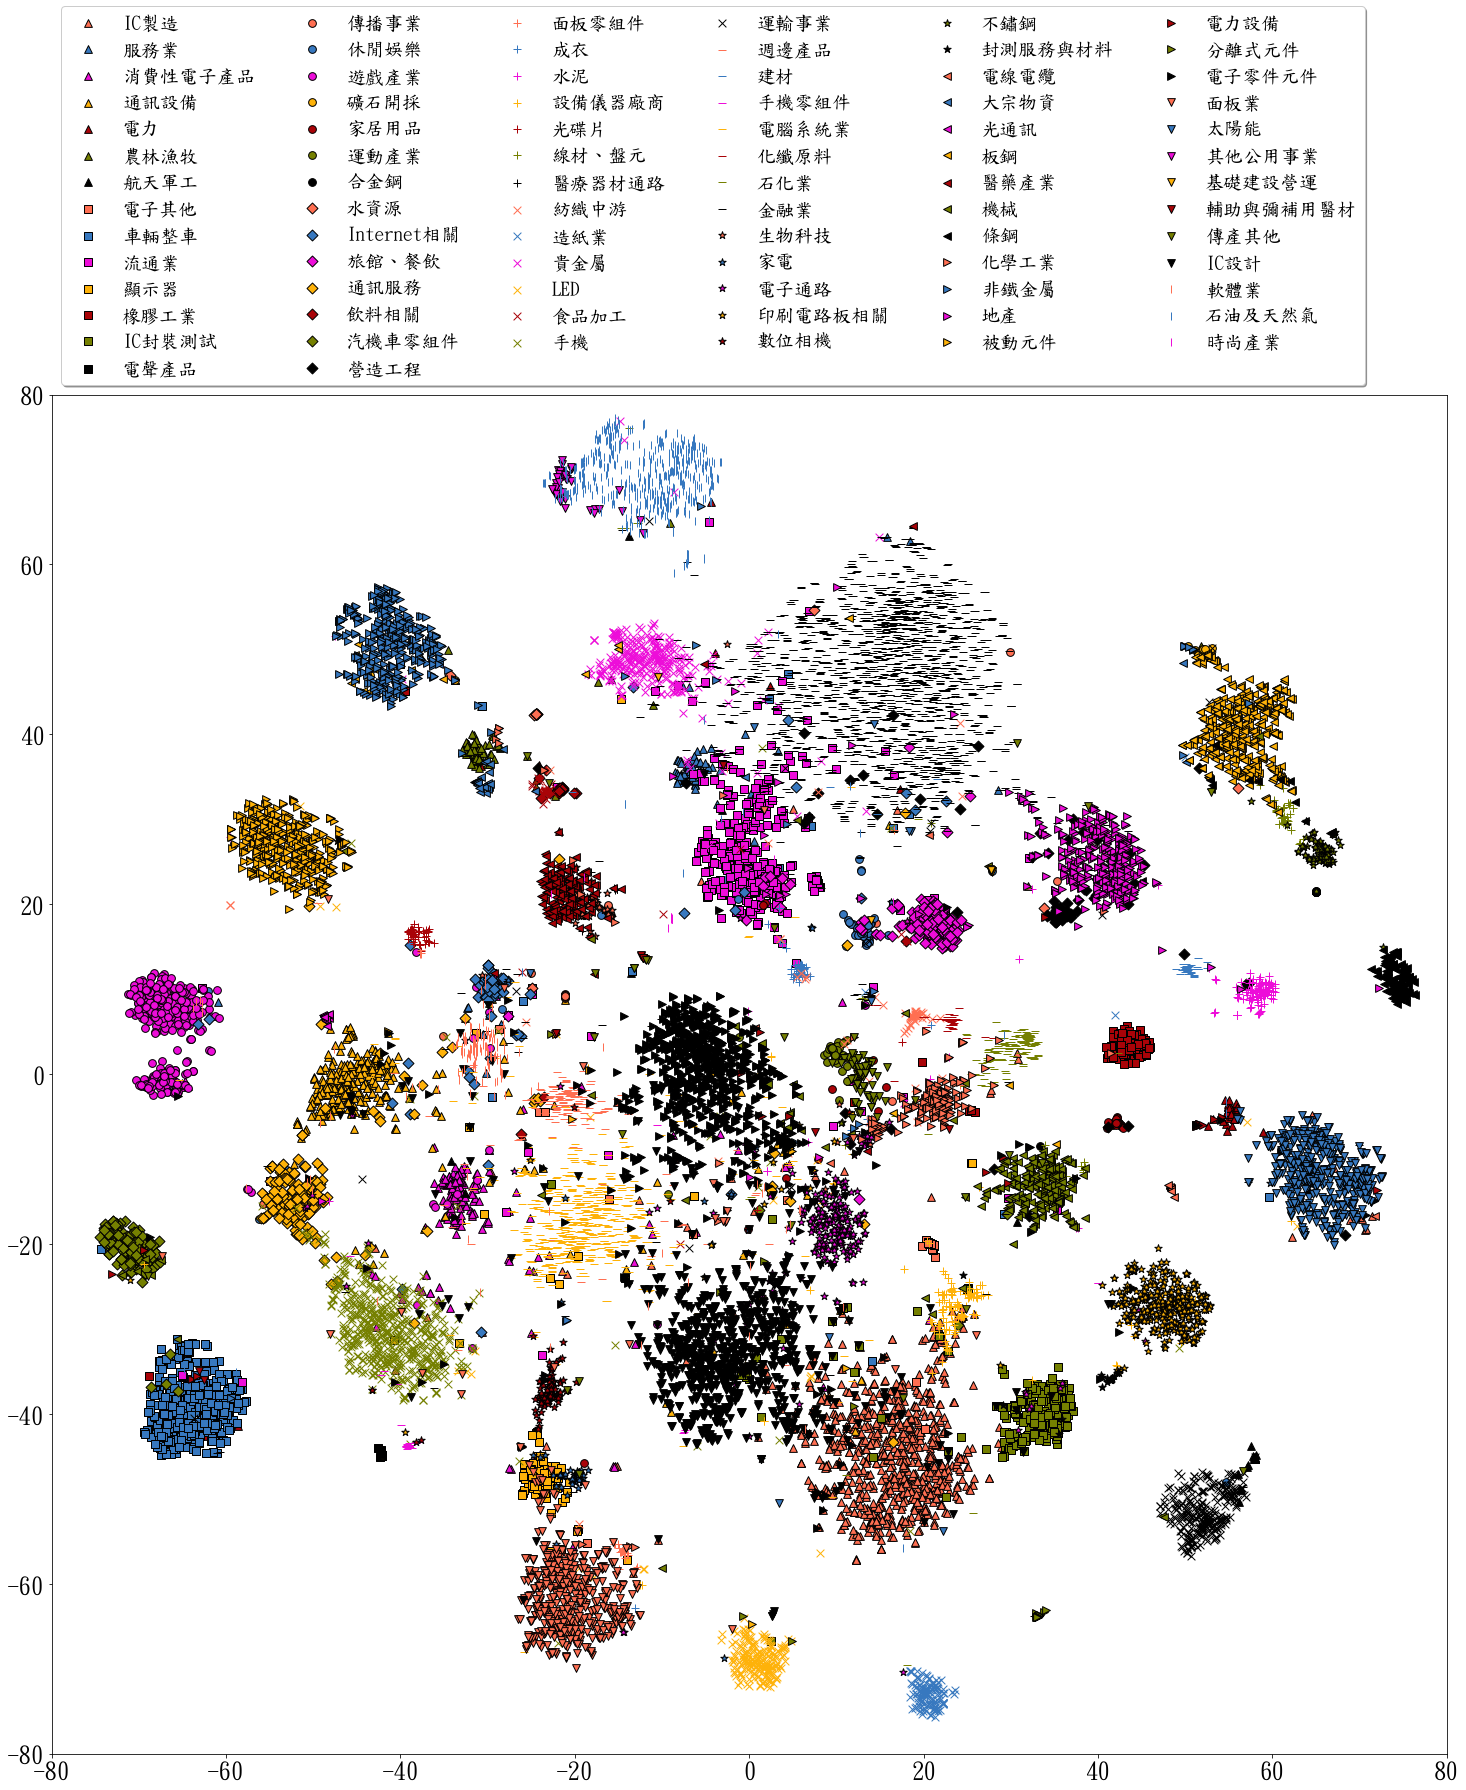

In [25]:
#plot
c=label
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000","0"]
marker=["^","s","o","D","+","x","_","*","<",">","v","|"]
import matplotlib
plt.figure(figsize=(25,25),)
for i,k in enumerate(set(c)):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=60,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(color))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-80,80))
plt.ylim((-80,80))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig("cosine.test.png")

(array([-80., -60., -40., -20.,   0.,  20.,  40.,  60.,  80.]),
 <a list of 9 Text yticklabel objects>)

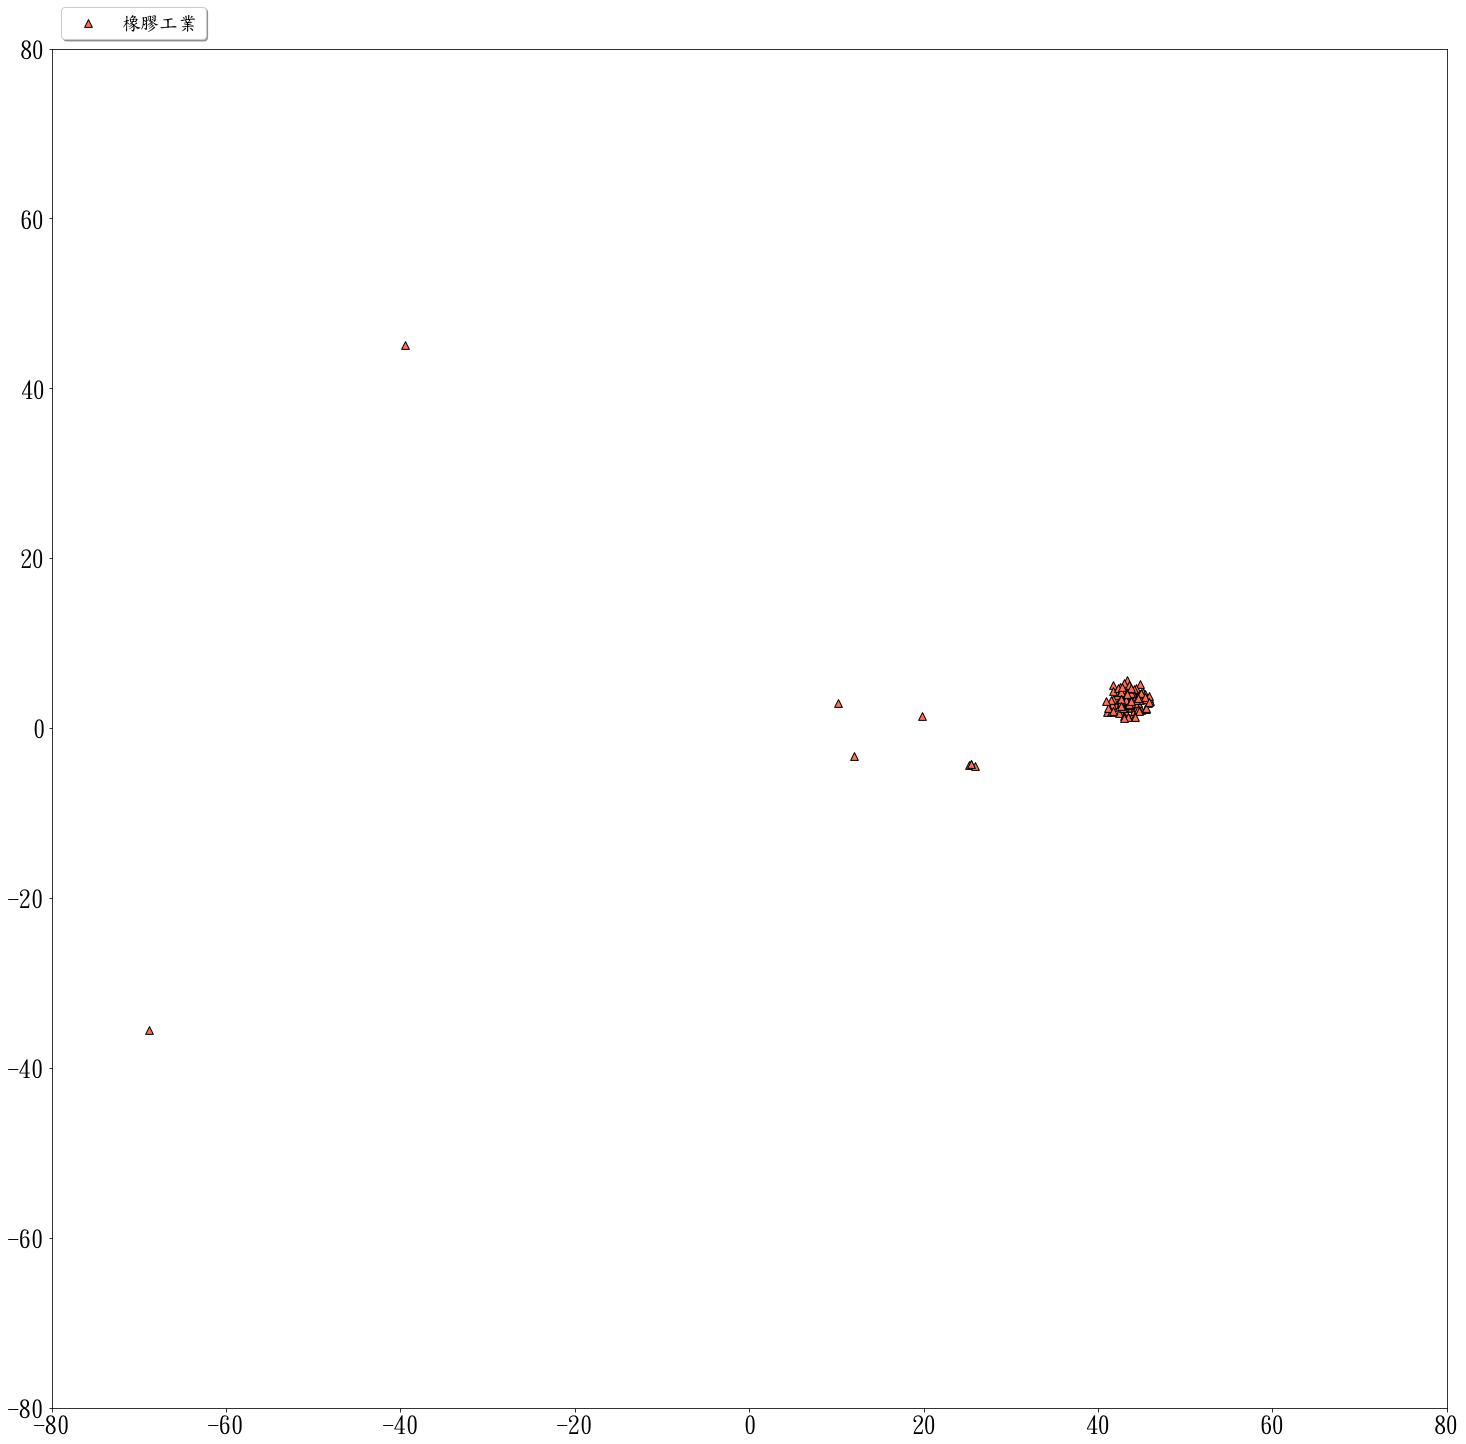

In [33]:
#plot
color=["#ff6f52","#3778bf","#ed0dd9","#feb209","#a90308","#758000","0"]
marker=["^","s","o","D","+","x","_","*","<",">","v","|"]
import matplotlib
plt.figure(figsize=(25,25),)
for i,k in enumerate(["橡膠工業"]):
    c=np.asarray(c)
    pick=c==k
    plt.scatter(x = intermediates_tsne[pick,0], y=intermediates_tsne[pick,1],
                c=color[i%len(color)],s=60,linewidth=1,edgecolors="black",
#                 cmap="flag",
                marker=marker[(i//len(color))%len(marker)],
                label=k,)
plt.legend(fontsize=19,
#            mode="expand",
           ncol=6,
           loc='lower left',
           bbox_to_anchor=(0,1),fancybox=True,shadow=True)
plt.xlim((-80,80))
plt.ylim((-80,80))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# plt.savefig("cosine.test.png")

In [ ]:
x=torch.randint(0,5,(100000,100000))

In [169]:
%%time
torch.sum(x*x)

Wall time: 418 ms


tensor(600080867)

In [170]:
%%time
torch.einsum("ij,ij->",x,x)

Wall time: 60.9 ms


tensor(600080867)